In [65]:
# Import libraries
import tweepy as tw
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import re
from wordcloud import WordCloud
# API key, API secret, access token, access token secret
API_KEY = 'sau5wefTlt00B89Sc6T1Os4Gy'
API_SECRET = 'JSg6Yyjx2o0oWETuFOiLoIXF1FAbTOj7FmX6GTS3vvIiJZNczk'
ACCESS_TOKEN = '2605619839-gosJKVnMUIbZPCGoC6cAzkzvAgto0jmg2r0DExD'
ACCESS_TOKEN_SECRET = 'siIkXRXgFuN1yUditYIYaWkVy8saqsWiEuwp69TM8CG3v'

# Authentification
auth = tw.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# API
api = tw.API(auth, wait_on_rate_limit=True)

In [66]:
# Remove urls function
def remove_url(txt):
  return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [67]:
# Create custom search and define the number of tweets
search_custom = "#ai OR #artificialintelligence articial OR intelligence OR future -filter:retweets"

# Taking the tweets
raw_tweets = tw.Cursor(api.search,
                       q=search_custom,
                       lang='en',
                       since='2021-01-01',
                       tweet_mode="extended").items(1000)

# Removing url on raw_tweets
raw_tweets_no_urls = [remove_url(raw_tweet.full_text) for raw_tweet in raw_tweets]
raw_tweets_no_urls[:10]

['How to Implement Artificial Intelligence in Mobile Application Developmentaidevelopment artificialintelligence machinelearning technology intelligence ai algorithms iot appdevelopmentservices appdevelopers',
 'Artificial Intelligence is changing the future of Digital MarketingTo know HowRead A Blogartificialintelligence AI artificialintelligencemarketing blog Article blogging blogger socialmediamarketing blogpost digitalmarketing',
 'Accessibility and the Future of MobilityAccessibility and the future of mobility mobility IoT sustainability AI',
 'MORE on Artificial intelligence AI startupraised fresh capital at a 28B valuation Edges Closer to IPO',
 'DurgeshBuch Dsomaiya2011 Accounting amp tax profession not only to survive against ArtificialIntelligence but also against Govt Intelligence FinMinIndia cbicindia IncomeTaxIndia nsitharaman ji Budget2021 will increase unemployment in this sectorAnilSinghvi EconomicTimes RahulGandhi',
 'datascience machinelearning python artificialintell

In [68]:
# Create textblob object raw_tweets_no_urls also take total of polarity
sentiment_objects = [TextBlob(raw_tweets_no_url) for raw_tweets_no_url in raw_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(-0.6,
 TextBlob("How to Implement Artificial Intelligence in Mobile Application Developmentaidevelopment artificialintelligence machinelearning technology intelligence ai algorithms iot appdevelopmentservices appdevelopers"))

In [69]:
# Create a list that consist of polarity values and the tweets
sentiment_values = [[sentiment_object.sentiment.polarity, str(sentiment_object)]for sentiment_object in sentiment_objects]

sentiment_values[:10]

[[-0.6,
  'How to Implement Artificial Intelligence in Mobile Application Developmentaidevelopment artificialintelligence machinelearning technology intelligence ai algorithms iot appdevelopmentservices appdevelopers'],
 [-0.19999999999999998,
  'Artificial Intelligence is changing the future of Digital MarketingTo know HowRead A Blogartificialintelligence AI artificialintelligencemarketing blog Article blogging blogger socialmediamarketing blogpost digitalmarketing'],
 [0.0,
  'Accessibility and the Future of MobilityAccessibility and the future of mobility mobility IoT sustainability AI'],
 [0.06666666666666667,
  'MORE on Artificial intelligence AI startupraised fresh capital at a 28B valuation Edges Closer to IPO'],
 [0.0,
  'DurgeshBuch Dsomaiya2011 Accounting amp tax profession not only to survive against ArtificialIntelligence but also against Govt Intelligence FinMinIndia cbicindia IncomeTaxIndia nsitharaman ji Budget2021 will increase unemployment in this sectorAnilSinghvi Eco

In [70]:
# Create dataframe from sentiment_values
sentiment_df = pd.DataFrame(sentiment_values, columns=['Polarity', 'Tweet'])

sentiment_df.head(10)

,Polarity,Tweet
0,-0.600000,How to Implement Artificial Intelligence in Mo...
1,-0.200000,Artificial Intelligence is changing the future...
2,0.000000,Accessibility and the Future of MobilityAccess...
3,0.066667,MORE on Artificial intelligence AI startuprais...
4,0.000000,DurgeshBuch Dsomaiya2011 Accounting amp tax pr...
5,0.000000,datascience machinelearning python artificiali...
6,-0.300000,Tomorrow we will be working on a big project i...
7,-0.200000,A perceptron is a simple binary classification...
8,0.000000,A study conducted by IntelIndia amp ISBedu fin...
9,-0.200000,What are your thoughts on AI and job security ...


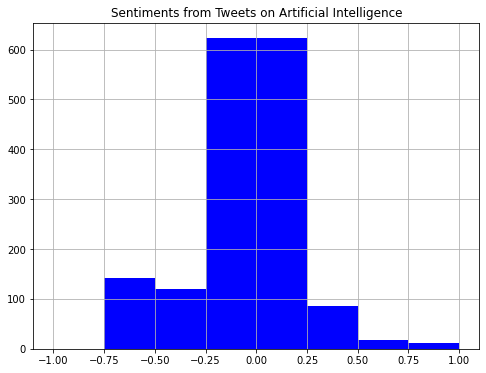

In [71]:
# Plot histogram of the polarity values
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Artificial Intelligence")
plt.show()

In [72]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.Polarity != 0]

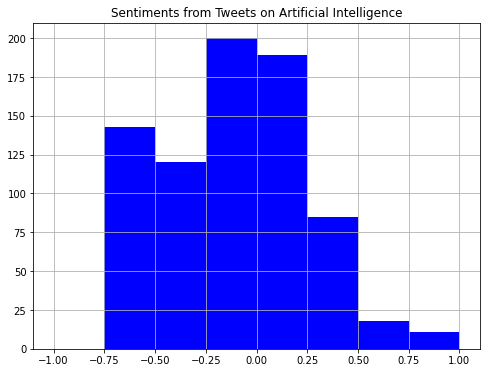

In [73]:
# Plot histogram with break at zero
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Artificial Intelligence")
plt.show()

In [74]:
# Get polarity values and get the sentiment from the tweets
total_polarity = 0
sentiment = ""

for tweet in sentiment_objects:
  total_polarity += tweet.polarity

total_polarity /= len(sentiment_objects)

if(total_polarity > 0):
  sentiment = "Positive"
else:
  sentiment = "Negative"

print("Polarity  : " + str(total_polarity))
print("Sentiment : " + sentiment)

Polarity  : -0.07775870958737023
Sentiment : Negative


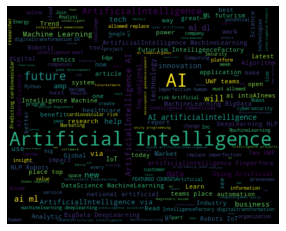

In [75]:
# Plot the word cloud
allWords = " ".join([tweet for tweet in sentiment_df["Tweet"]])
wordcloud = WordCloud(width = 500, height = 400, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()